# Introduction

# Heart Disease Classification

### Challenge in healthcare industry
> Early detection of heart disease in patients for immediate treatment and medical care

### Problem
> What patient information would best predict presence of heart disease

# Import Generic Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import itertools

# Load Data

> ### The Dataset

[Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)


1.   **Demographics**


*   Age
*   Sex


2.   **Clinical Results**


* Chest Pain
* Resting ECG Results
* Slope of peak exercise ST segment
* Resting Blood Pressure
* Maximum Heart Rate Achieved
* Number of Major Blood Vessel, 
* Cholesterol
* Exercise Induced Angina
* Thal
* Fasting Blood Sugar
* ST Depression induced by exercise relative to rest


3.   **Presence of Heart Disease**


* Yes
* No



In [0]:
data = pd.read_csv('heart_classification.csv')

# Explore your Data

In [41]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
dataset = pd.get_dummies(data, columns=["sex","cp","fbs","restecg","exang","slope","ca","thal"])

# Data Visualization

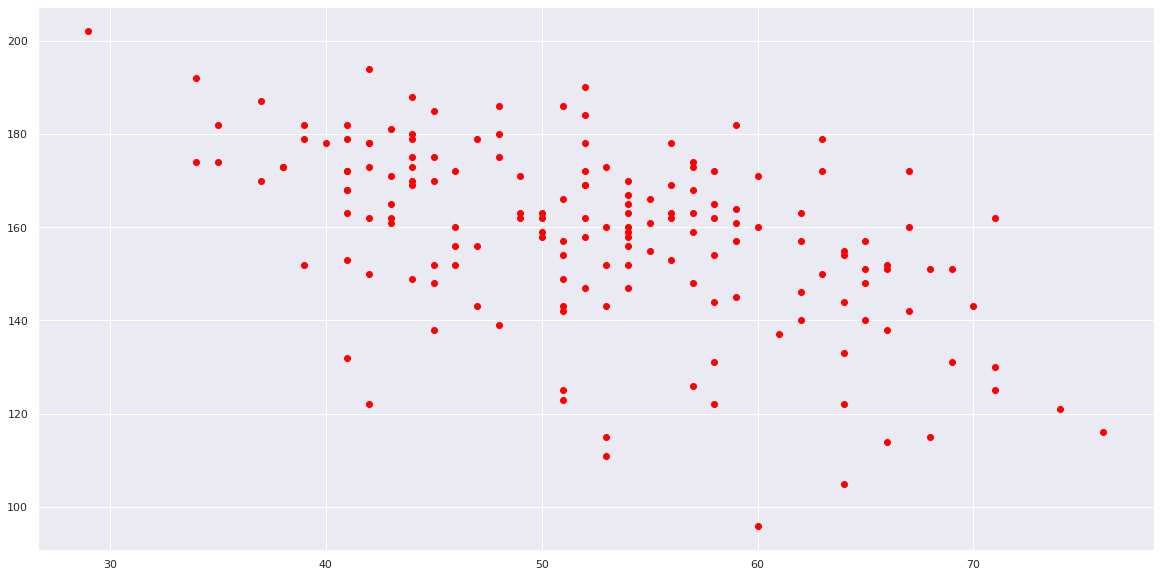

In [0]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")

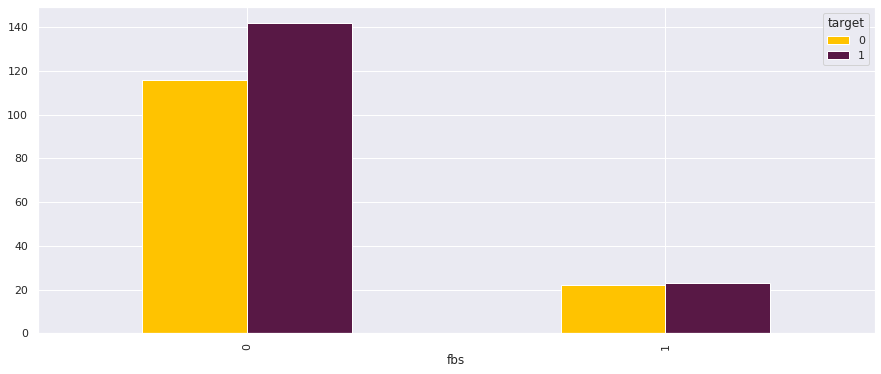

In [0]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])

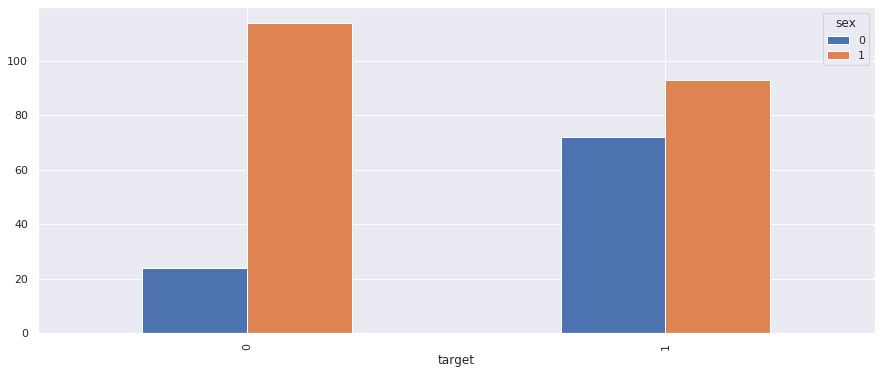

In [0]:
pd.crosstab(data['target'],data['sex']).plot(kind="bar",figsize=(15,6))
plt.show()

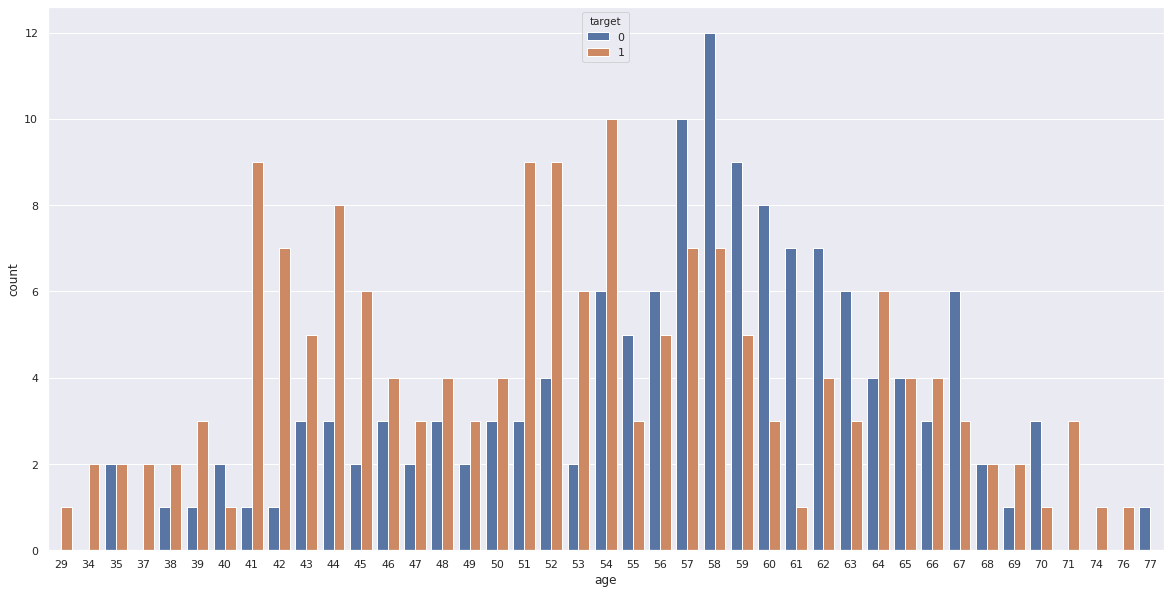

In [0]:
sns.countplot(data = data, x = 'age', hue = 'target')

In [0]:
correlation_coefficients = data.corr()
correlation_coefficients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


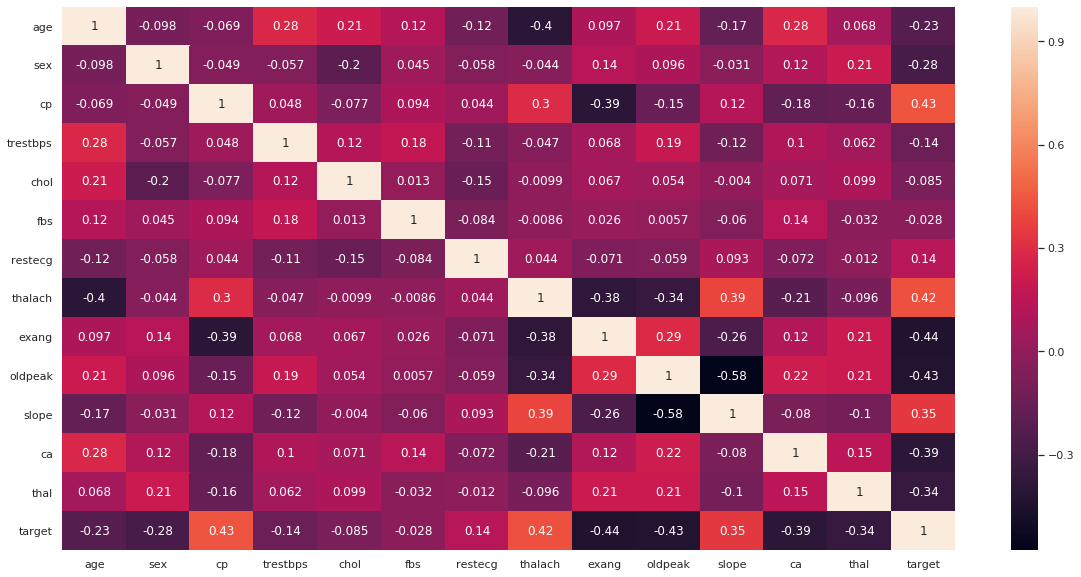

In [0]:
sns.heatmap(correlation_coefficients, annot=True)

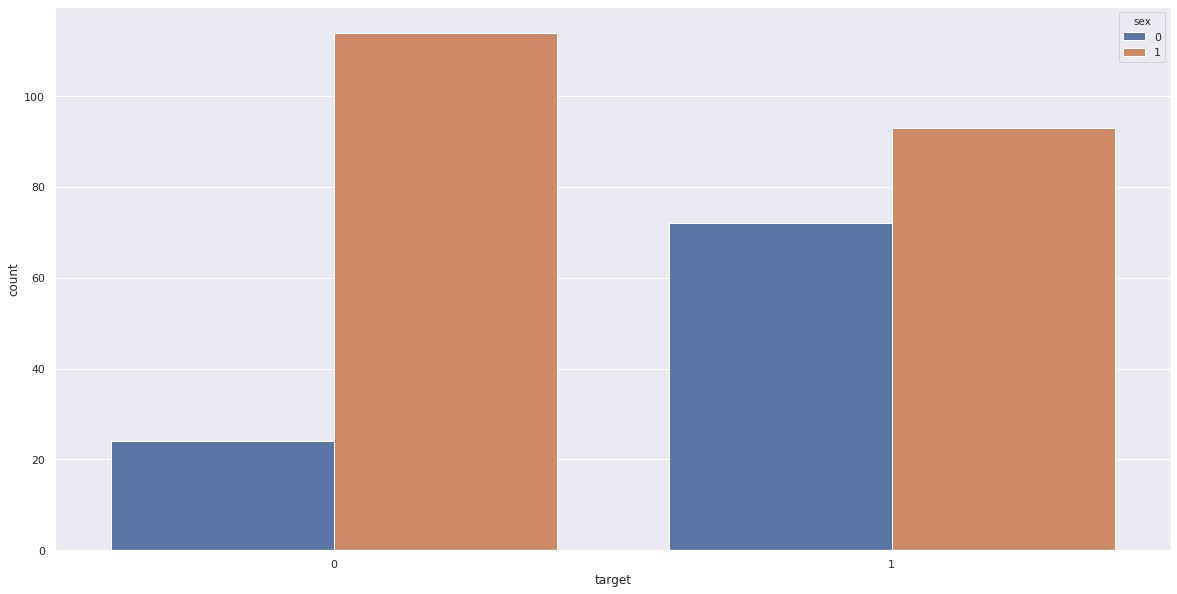

In [0]:
sns.countplot(x='target', hue='sex', data=data)

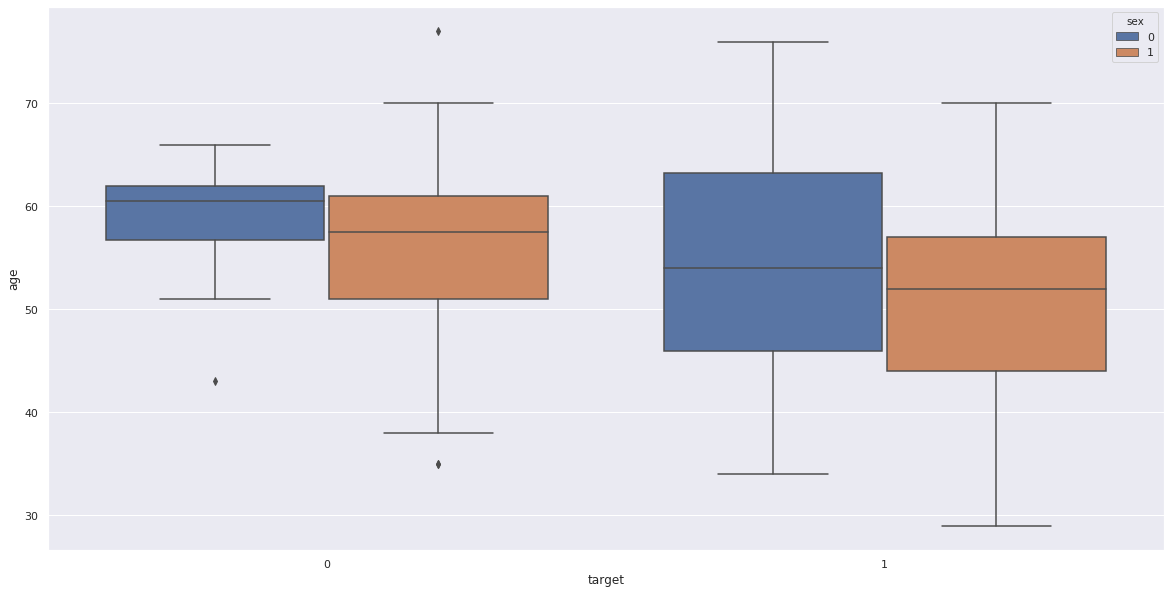

In [0]:
sns.boxplot(x="target", y="age", hue="sex", data=data);

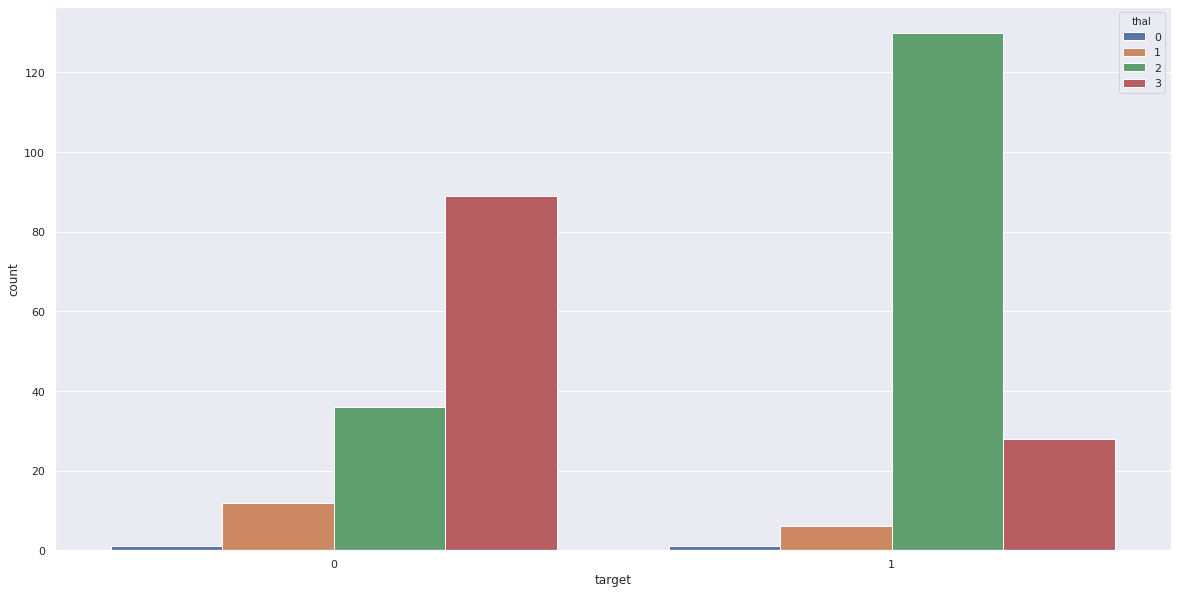

In [0]:
sns.countplot(x='target', hue='thal', data=data)

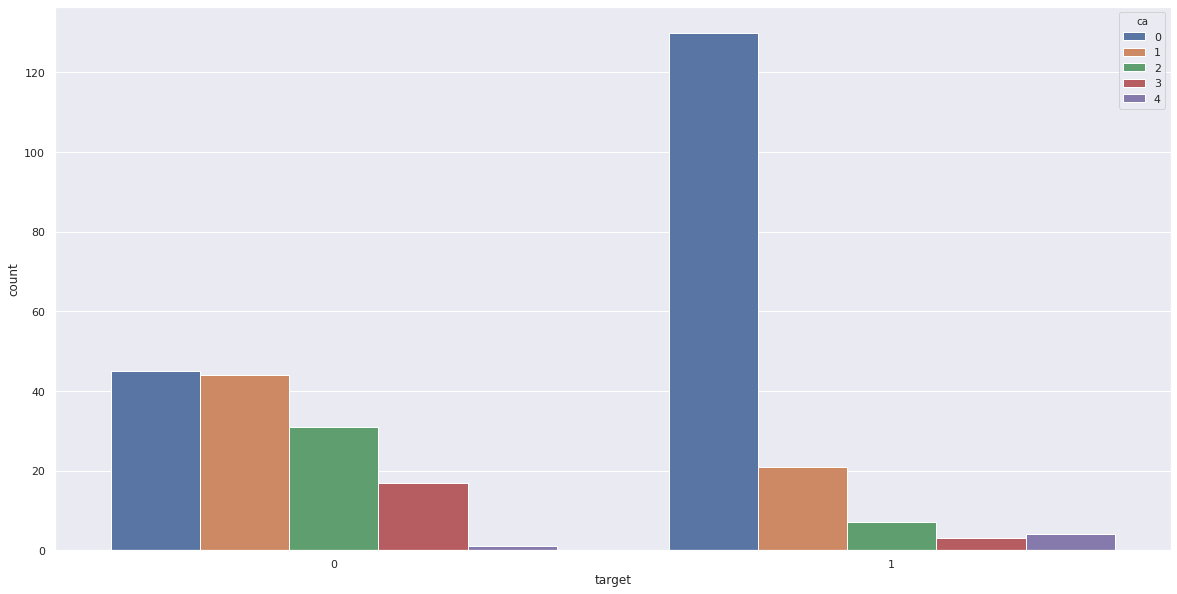

In [0]:
sns.countplot(x='target', hue='ca', data=data)

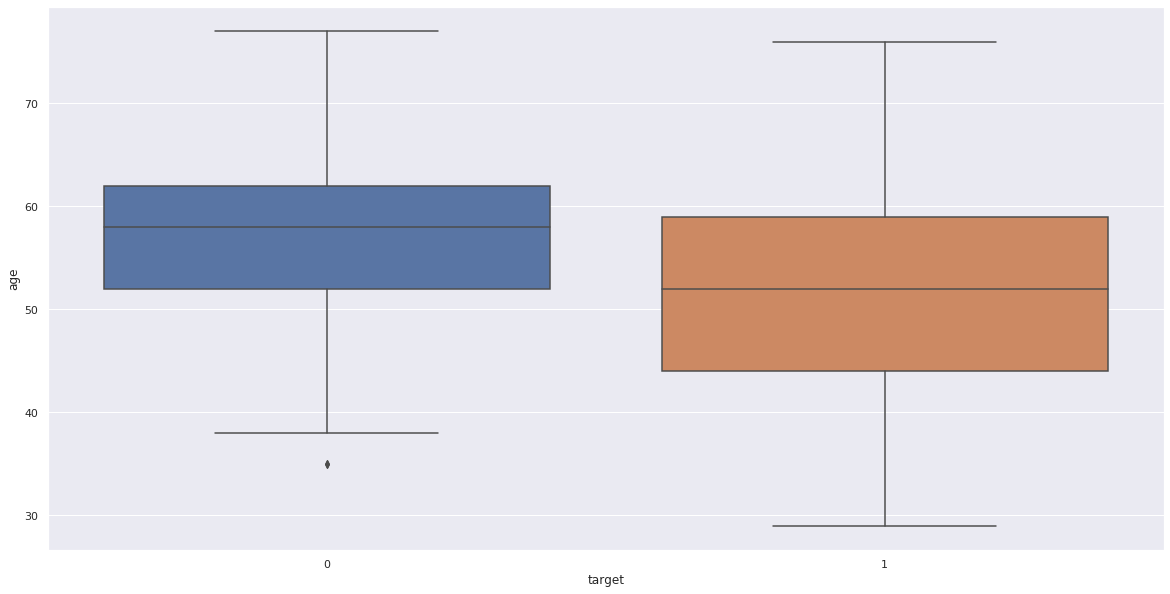

In [0]:
sns.boxplot(x="target", y="age", data=data);

# Train-Test Split

In [0]:
# List of Features
features = ['sex','cp','chol','thalach','exang','oldpeak','slope','ca']

# Set X
X = data[features]

# Set Y
y = data['target']

In [0]:
dataset = pd.get_dummies(data, columns=["sex","cp","fbs","restecg","exang","slope","ca","thal"])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Predictive Analytics

In [0]:
# Initiliaze model
log_reg = LogisticRegression(max_iter=101)

# Fit model
log_reg.fit(X_train, y_train)

# Metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# Predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Feature Importance
log_reg.coef_

array([[-1.26646726,  0.94012974, -0.0029524 ,  0.01003337, -0.93422418,
        -0.52666786,  0.68928099, -1.23486092]])

# Metrics

In [0]:
acc

0.860655737704918

In [0]:
# Confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[46,  6],
       [11, 59]])

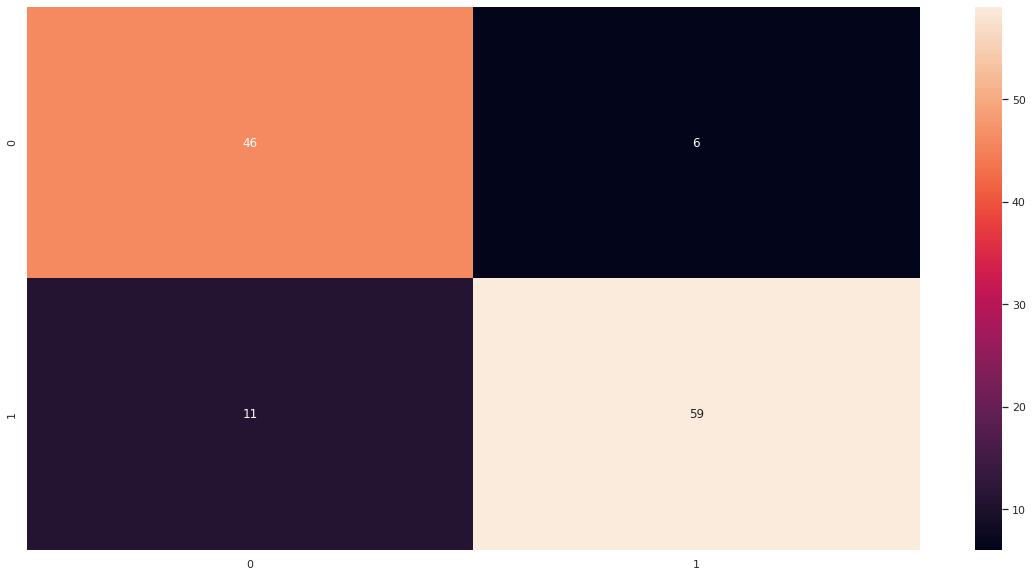

In [0]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

# Results

86% accuracy - the model is able to predict the presence of heart disease but it can be improved.

# Explain Predictions

In [29]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

,sex,cp,chol,thalach,exang,oldpeak,slope,ca,predictions
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,0.859649,0.385965,244.666667,137.982456,0.526316,1.735088,1.105263,1.578947,0.0
std,0.350438,0.818413,48.280184,20.538719,0.503745,1.453750,0.588103,1.223977,0.0
min,0.000000,0.000000,164.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,208.000000,125.000000,0.000000,0.400000,1.000000,1.000000,0.0
50%,1.000000,0.000000,243.000000,143.000000,1.000000,1.600000,1.000000,2.000000,0.0
75%,1.000000,0.000000,282.000000,150.000000,1.000000,2.600000,1.000000,2.000000,0.0
max,1.000000,3.000000,409.000000,173.000000,1.000000,6.200000,2.000000,4.000000,0.0


In [31]:
test_data[test_data['predictions']==1].describe()

,sex,cp,chol,thalach,exang,oldpeak,slope,ca,predictions
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,0.60000,1.261538,240.969231,160.692308,0.107692,0.484615,1.692308,0.230769,1.0
std,0.49371,0.956506,44.690942,17.847376,0.312404,0.691518,0.497590,0.523487,0.0
min,0.00000,0.000000,126.000000,114.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.00000,0.000000,210.000000,152.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,1.00000,1.000000,234.000000,162.000000,0.000000,0.000000,2.000000,0.000000,1.0
75%,1.00000,2.000000,262.000000,172.000000,0.000000,1.000000,2.000000,0.000000,1.0
max,1.00000,3.000000,394.000000,202.000000,1.000000,2.600000,2.000000,2.000000,1.0


# Predict on New Data

In [42]:
# Create new data
new_data = [[1,	3,233, 150,	0, 2.3,	0,	0]]

log_reg.predict(new_data)

array([1])